In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mall_c = pd.read_csv('Mall_Customers.csv')

In [3]:
mall_c.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
mall_c.shape

(200, 5)

In [5]:
mall_c.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
mall_c.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [7]:
mall_c.to_csv('combined_customers_date',index=False)

In [8]:
mall_c.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [18]:
mall_c.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
mall_c.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

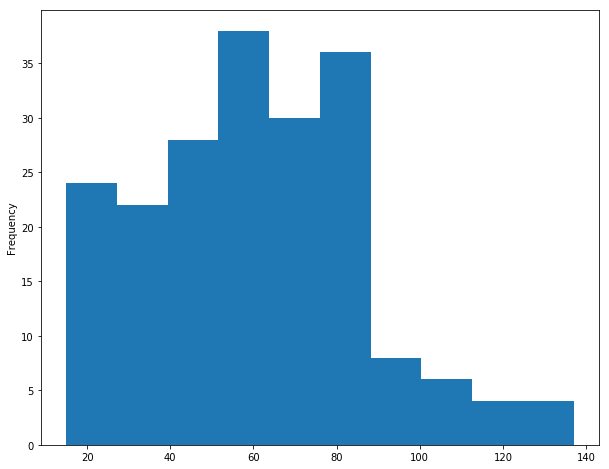

In [19]:
mall_c['Annual Income (k$)'].plot.hist(bins=10, figsize=(10, 8));

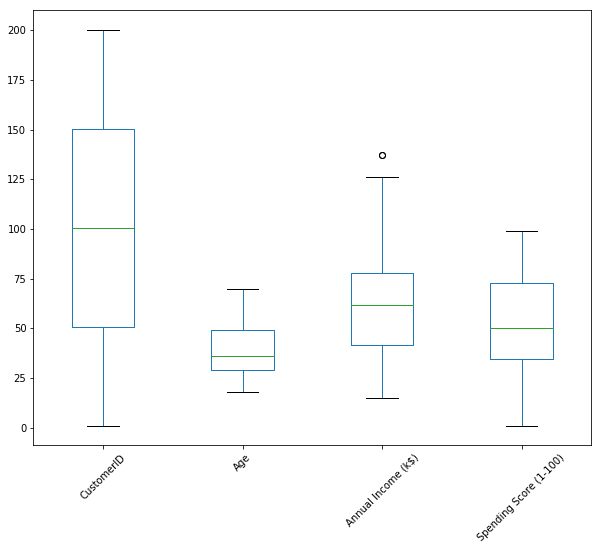

In [20]:
boxplot = mall_c.boxplot(grid=False, rot=45, figsize=(10, 8))

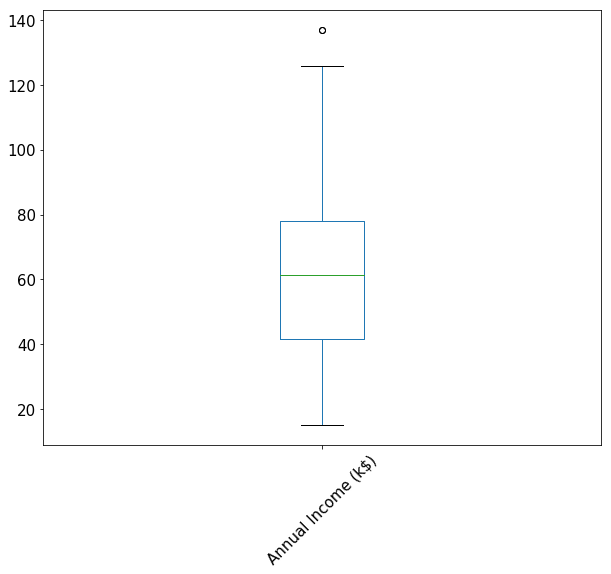

In [21]:
boxplot = mall_c.boxplot(grid=False, rot=45,fontsize=15,column=['Annual Income (k$)'], figsize=(10, 8))

In [22]:
mall_c.loc[mall_c['Annual Income (k$)'] > 125]

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

In [23]:
Q1 = mall_c['Annual Income (k$)'].quantile(0.25)
Q3 = mall_c['Annual Income (k$)'].quantile(0.75)

In [24]:
print(Q1, Q3)

41.5 78.0


In [25]:
IQR = Q3 - Q1

In [26]:
print(IQR)

36.5


In [27]:
minimum = Q1 - 1.5 * IQR
maximum = Q3 + 1.5 * IQR

In [28]:
print(minimum, maximum)

-13.25 132.75


In [29]:
mall_c['Annual Income (k$) Outlier'] = False

In [32]:
mall_c['Annual Income (k$) Outlier'].head()

0    False
1    False
2    False
3    False
4    False
Name: Annual Income (k$) Outlier, dtype: bool

In [45]:
for index, row in mall_c.iterrows():
    
    if row['Annual Income (k$)']  > Q1 + 1.5 * IQR:
        mall_c.at[index, 'Annual_Income_Outlier'] = True

In [46]:
mall_c['Annual_Income_Outlier'].sum()

20

In [47]:
print(mall_c[mall_c['Annual_Income_Outlier'] == True])

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
180         181  Female   37                  97                      32   
181         182  Female   32                  97                      86   
182         183    Male   46                  98                      15   
183         184  Female   29                  98                      88   
184         185  Female   41                  99                      39   
185         186    Male   30                  99                      97   
186         187  Female   54                 101                      24   
187         188    Male   28                 101                      68   
188         189  Female   41                 103                      17   
189         190  Female   36                 103                      85   
190         191  Female   34                 103                      23   
191         192  Female   32                 103                      69   
192         

In [51]:
mall_c = mall_c.rename(columns={"Annual Income (k$)": "Annual Income","Annual Income (k$) Outlier": "Annual Income Outlier"})

In [52]:
mall_c.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income',
       'Spending Score (1-100)', 'Annual Income Outlier',
       'Annual_Income_Outlier'],
      dtype='object')

In [53]:
mean = mall_c['Annual Income'].mean()

In [54]:
mean

60.56

In [55]:
for index, row in mall_c.iterrows():
    if row['Annual Income Outlier'] == True:
        mall_c.at[index, 'Annual Income'] = mean

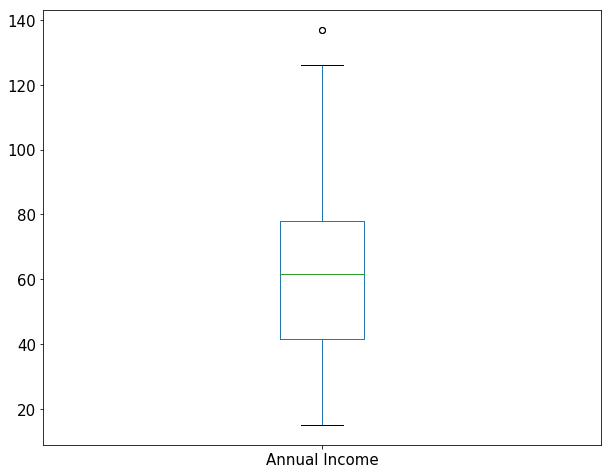

In [56]:
boxplot = mall_c.boxplot(grid=False, fontsize=15,
                        column=['Annual Income'], figsize=(10, 8)); 